In [18]:
import pip

try:
    __import__('keras')
except ImportError:
    pip.main(['install', 'keras']) 
    
try:
    __import__('h5py')
except ImportError:
    pip.main(['install', 'h5py']) 
    
try:
    __import__('ibmiotf')
except ImportError:
    pip.main(['install', 'ibmiotf']) 
    
try:
    __import__('urllib.request')
except ImportError:
    pip.main(['install','urllib.request'])
    
try:
    __import__('paho-mqtt')
except ImportError:
    pip.main(['install','paho-mqtt'])



Requirement not upgraded as not directly required: paho-mqtt in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages


In [61]:
import numpy as np
from numpy import concatenate
from numpy import array
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from  sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import pickle
import json
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ibmiotf.application
from queue import Queue
import urllib.request
import paho.mqtt.client as mqtt

%matplotlib inline

In [62]:
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_4fa09117a4174c06b63a358a57f58fd2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='z17VrppZ5H4JnN5ILbBIsfIQ8URkQtssLVj4DtCtt8PN',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_4fa09117a4174c06b63a358a57f58fd2.get_object(Bucket='anomalydetection-donotdelete-pr-xsranupf3veudd',Key='healthy.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data_healthy = pd.read_csv(body).iloc[:, :].values[:, :] 

body = client_4fa09117a4174c06b63a358a57f58fd2.get_object(Bucket='anomalydetection-donotdelete-pr-xsranupf3veudd',Key='broken.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data_broken = pd.read_csv(body).iloc[:, :].values[:, :] 




Starting new HTTPS connection (1): s3.eu-geo.objectstorage.service.networklayer.com


In [5]:
#  !rm watsoniotp.*
# !wget https://github.com/romeokienzler/developerWorks/blob/master/lorenzattractor/watsoniotp.healthy.phase_aligned.json
# !wget https://github.com/romeokienzler/developerWorks/blob/master/lorenzattractor/watsoniotp.broken.phase_aligned.json

In [6]:
# data_healthy = pickle.load(open('watsoniotp.healthy.phase_aligned.pickle','rb'), encoding='latin1')
# data_broken = pickle.load(open('watsoniotp.broken.phase_aligned.pickle','rb'), encoding='latin1')
# data2 = []
# with open('watsoniotp.broken.phase_aligned.pickle','rb') as f:
#     for _ in range(pickle.load(f), encoding='latin1'):
#         data2.append(pickle.load(f), encoding='latin1')
# # infile = open('watsoniotp.healthy.phase_aligned.pickle','wb')
# # pickle.dump(array([]), infile)
# # infile.close()
# # cm = open('watsoniotp.broken.phase_aligned.pickle','wb')
# # pickle.dump(array([]), cm)

# # cm.close()

# with open('watsoniotp.healthy.phase_aligned.json', 'r') as f:
#     print(f)
# with open('watsoniotp.broken.phase_aligned.json', 'r') as f:
#     print(f)

In [7]:
# data_healthy = pickle.load(open('watsoniotp.healthy.pickle','rb'), encoding='latin1')
# data_broken = pickle.load(open('watsoniotp.broken.pickle','rb'), encoding='latin1')

In [8]:
# data_healthy = data_healthy.reshape(3000,3)
# data_broken = data_broken.reshape(3000,3)

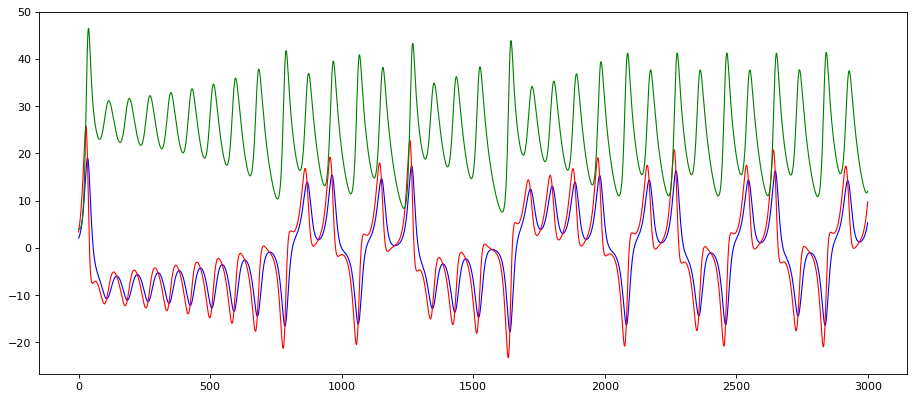

In [63]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,size), data_healthy[:,0], '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy[:,2], '-', color='green', animated = True, linewidth=1)

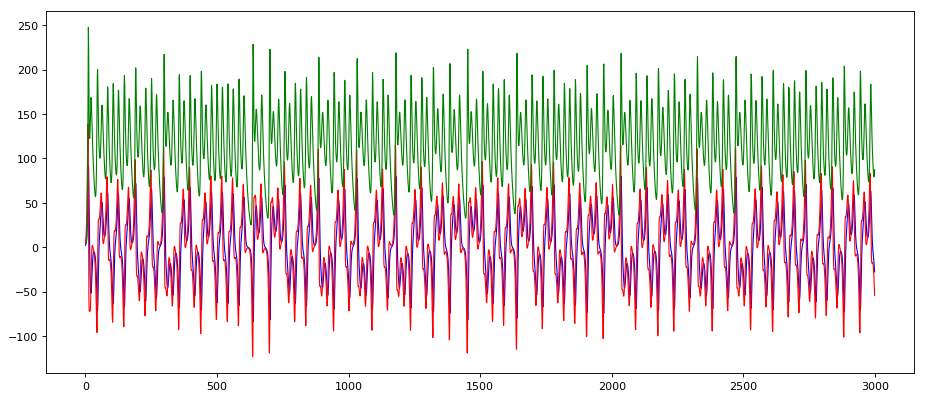

In [64]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,size), data_broken[:,0], '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken[:,2], '-', color='green', animated = True, linewidth=1)

In [65]:
data_healthy_fft = np.fft.fft(data_healthy)
data_broken_fft = np.fft.fft(data_broken)

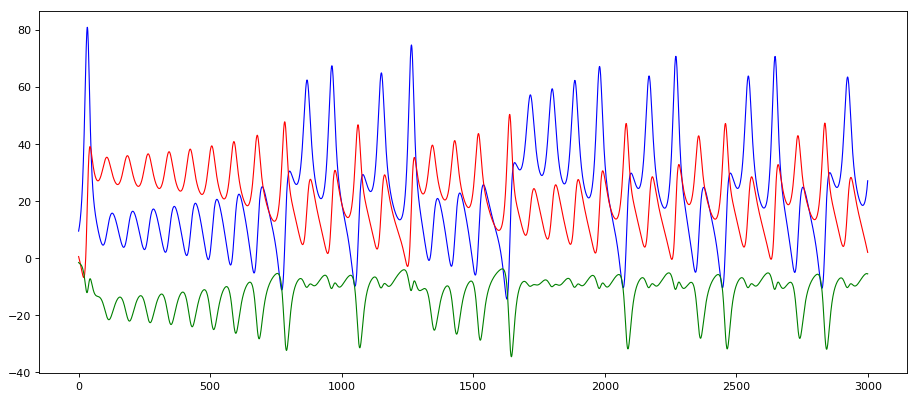

In [66]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
ax.plot(range(0,size), data_healthy_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy_fft[:,1].imag, '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy_fft[:,2].real, '-', color='green', animated = True, linewidth=1)


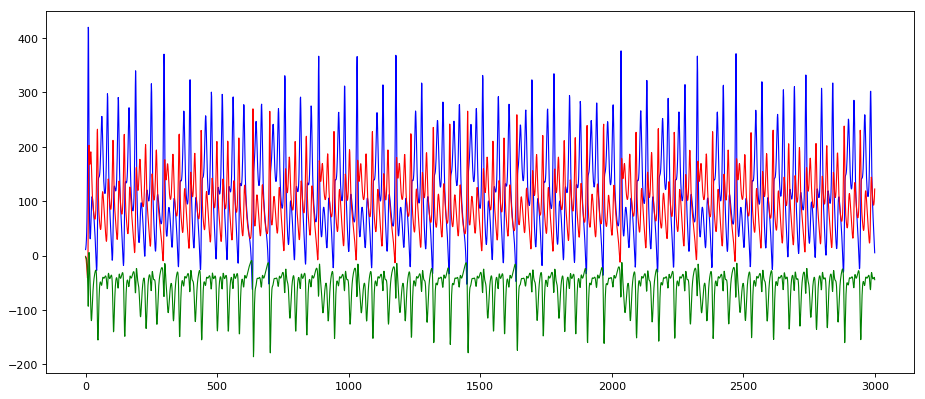

In [67]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
ax.plot(range(0,size), data_broken_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,1].imag, '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,2].real, '-', color='green', animated = True, linewidth=1)


In [68]:
def scaleData(data):
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(data)

In [69]:
data_healthy_scaled = scaleData(data_healthy)
data_broken_scaled = scaleData(data_broken)

In [70]:
timesteps = 10
dim = 3
samples = 3000
data_healthy_scaled_reshaped =data_healthy_scaled
#reshape to (300,10,3)
data_healthy_scaled_reshaped.shape = (int(samples/timesteps),timesteps,dim)

In [71]:
losses = []

def handleLoss(loss):
        global losses
        losses+=[loss]
        

In [72]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        handleLoss(logs.get('loss'))

In [73]:
# design network

model = Sequential()
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(Dense(3))
model.compile(loss='mae', optimizer='adam')

def train(data):
    data.shape = (300, 10, 3)
    model.fit(data, data, epochs=50, batch_size=72, validation_data=(data, data), verbose=0, shuffle=False,callbacks=[LossHistory()])
    data.shape = (3000, 3)

def score(data):
    data.shape = (300, 10, 3)
    yhat =  model.predict(data)
    yhat.shape = (3000, 3)
    return yhat

In [74]:
for i in range(10):
    
    print("----------------")
    train(data_healthy_scaled)
    yhat_healthy = score(data_healthy_scaled)
    yhat_broken = score(data_broken_scaled)
    data_healthy_scaled.shape = (3000, 3)
    data_broken_scaled.shape = (3000, 3)


print("----------------broken")
train(data_broken_scaled)
yhat_healthy = score(data_healthy_scaled)
yhat_broken = score(data_broken_scaled)
data_healthy_scaled.shape = (3000, 3)
data_broken_scaled.shape = (3000, 3)

----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------broken


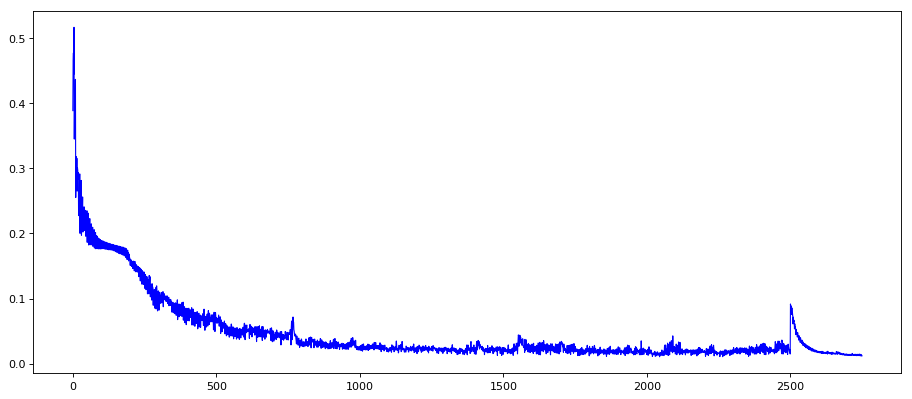

In [75]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,len(losses)), losses, '-', color='blue', animated = True, linewidth=1)

In [109]:
def doNN(data):
    data_scaled = scaleData(data)
    train(data_scaled)
    yhat = score(data_scaled)
    return yhat
    

In [82]:
print(score(data_healthy))

[[ 0.9667064   0.59244263  1.01141798]
 [ 0.93564284  0.2727066   0.92482662]
 [ 1.00096536  0.11778873  0.94707841]
 ..., 
 [ 0.8495394   0.01570046  0.78915429]
 [ 0.82591987  0.0227554   0.76735348]
 [ 0.80704731  0.02910759  0.74885446]]


In [83]:
y=score(data_broken)

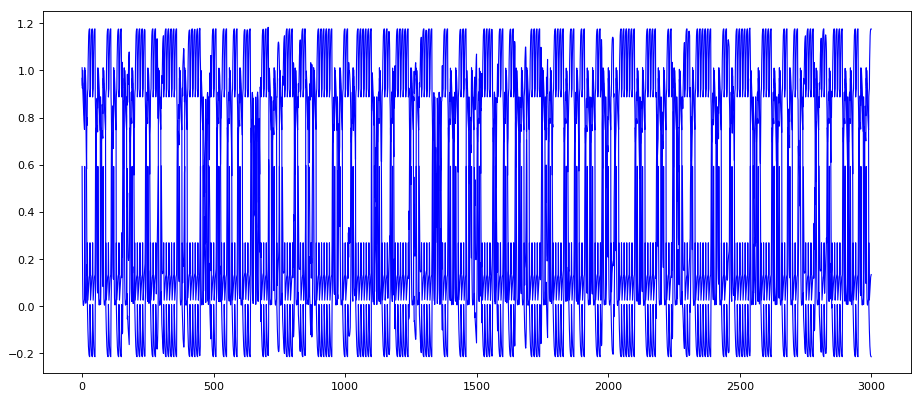

In [84]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(y)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,len(y)), y, '-', color='blue', animated = True, linewidth=1)

In [87]:
def avge(times):
    N = float(len(times))
    return (sum(t[0] for t in times)/N,
            sum(t[1] for t in times)/N,
            sum(t[2] for t in times)/N)

In [116]:
def getavg(d):
    return sum(avge(avge(d)))/3

In [95]:
body = client_4fa09117a4174c06b63a358a57f58fd2.get_object(Bucket='anomalydetection-donotdelete-pr-xsranupf3veudd',Key='train_data_new.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(body).iloc[:, :].values[:, :] 

body = client_4fa09117a4174c06b63a358a57f58fd2.get_object(Bucket='anomalydetection-donotdelete-pr-xsranupf3veudd',Key='test_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test = pd.read_csv(body).iloc[:, :].values[:, :] 


In [99]:
import pip

try:
    __import__('twilio')
except ImportError:
    pip.main(['install', 'twilio']) 

Requirement not upgraded as not directly required: pytz in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from twilio)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from twilio)
Requirement not upgraded as not directly required: requests>=2.0.0; python_version >= "3.0" in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from twilio)
Requirement not upgraded as not directly required: pysocks; python_version >= "3.0" in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from twilio)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests>=2.0.0; python_version >= "3.0"->twilio)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests>=2.0.0; python_version >= "3.0"->twilio)
Requirement not upgraded as not directly requi

In [148]:
from twilio.rest import Client


# Your Account Sid and Auth Token from twilio.com/console
account_sid = 'AC7430ce65c68503b2656b01032fa78808'
auth_token = '24761544d40f84ee0833a5b0ea923936'
client = Client(account_sid, auth_token)

def sendErrorMessage():
    message = client.messages.create(
                              from_='+19712973539',
                              body='There is a pothole in the road',
                              to='+91 88077 11676'
                          )
    print(message.sid)
    print(" ")
    print("Message Sent")



In [144]:
def plotGraph(y):
    fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
    size = len(y)
    ax.plot(range(0,size), y[:,0].real, '-', color='blue', animated = True, linewidth=1)
    ax.plot(range(0,size), y[:,1].imag, '-', color='red', animated = True, linewidth=1)
    ax.plot(range(0,size), y[:,2].real, '-', color='green', animated = True, linewidth=1)



In [150]:
def compareData(tr,ts):
    x=score(tr)
    y=score(ts)
    plotGraph(x)
    plotGraph(y)
    print(" ")
    if getavg(data_healthy_scaled)>getavg(data_broken_scaled):
        print("No potholes found")
    else:
        sendErrorMessage()
        print(" ")
        print("There is a pothole in this place")
    

 
POST Request: https://api.twilio.com/2010-04-01/Accounts/AC7430ce65c68503b2656b01032fa78808/Messages.json
PAYLOAD: {'To': '+91 88077 11676', 'From': '+19712973539', 'Body': 'There is a pothole in the road'}
POST Response: 201 {"sid": "SM41f10a9bbceb4b7995364bd8b67f18a4", "date_created": "Tue, 28 Aug 2018 16:30:00 +0000", "date_updated": "Tue, 28 Aug 2018 16:30:00 +0000", "date_sent": null, "account_sid": "AC7430ce65c68503b2656b01032fa78808", "to": "+918807711676", "from": "+19712973539", "messaging_service_sid": null, "body": "Sent from your Twilio trial account - There is a pothole in the road", "status": "queued", "num_segments": "1", "num_media": "0", "direction": "outbound-api", "api_version": "2010-04-01", "price": null, "price_unit": "USD", "error_code": null, "error_message": null, "uri": "/2010-04-01/Accounts/AC7430ce65c68503b2656b01032fa78808/Messages/SM41f10a9bbceb4b7995364bd8b67f18a4.json", "subresource_uris": {"media": "/2010-04-01/Accounts/AC7430ce65c68503b2656b01032fa78

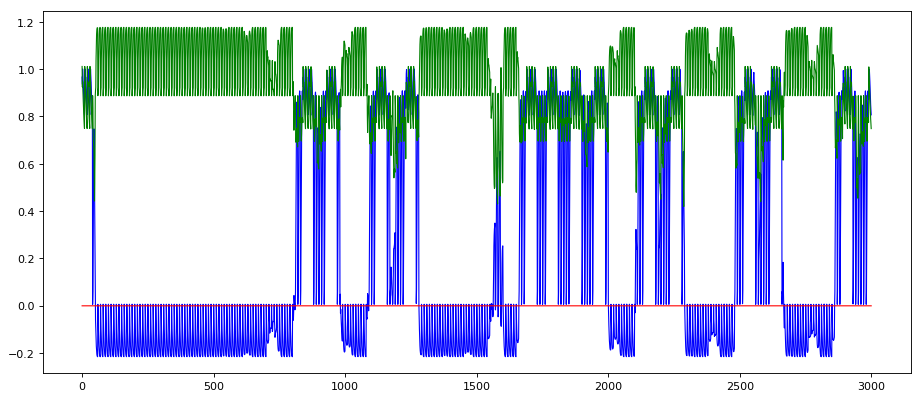

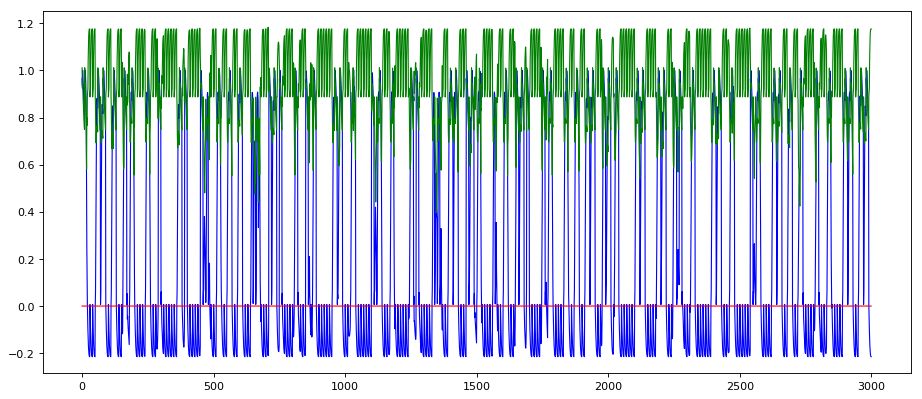

In [151]:
compareData(data_healthy,data_broken)